# Gradient Descent

$$ f(x) = x^2 -x -2 $$
$$ f'(x) = 2x-1  $$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

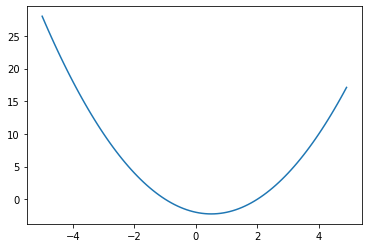

In [3]:
X=np.arange(-5,5,0.1)
def f(x):
    return x**2-x-2
plt.plot(X,f(X))

In [20]:
x = 5
x_old = 2 # initial
eps = 0.01
precision = 0.000001 

# 도함수 (미분)
def fp(x):
    return 2*x-1

In [21]:
# 경사하강법
while (abs(x - x_old)>precision):
    x_old = x
    x = x_old - eps*fp(x_old)
x

0.500048659916094

## When we do not know f'(x)

## Local minimum

$$ g(x) = x^4 -3x^2 + x  $$
$$ g'(x) = 4x^3-6x +1  $$

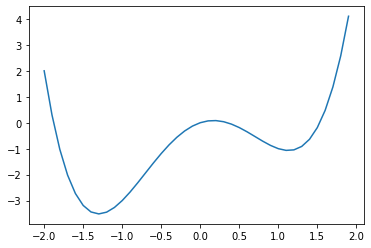

In [26]:
X=np.arange(-2,2,0.1)
def g(x):
    return x**4-3*x**2+x
plt.plot(X,g(X))

In [28]:
def gp(x):
    return 4*x**3-6*x+1

x = 5
x_old =2
while (abs(x - x_old)>precision):
    x_old = x
    x = x_old - eps*gp(x_old)

In [29]:
x

1.1308914550137423